In [206]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm, skew, boxcox_normmax
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [118]:
# Reading csv as a dataframe
data = pd.read_csv('marketing_customer_analysis.csv')
data

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [119]:
data.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [120]:
data = data.drop(['Unnamed: 0'], axis=1)

In [122]:
# shape of the dataframe
data.shape

(10910, 25)

In [123]:
# Standardization of header names
def standardization(df):
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(' ','_')

In [124]:
standardization(data)
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


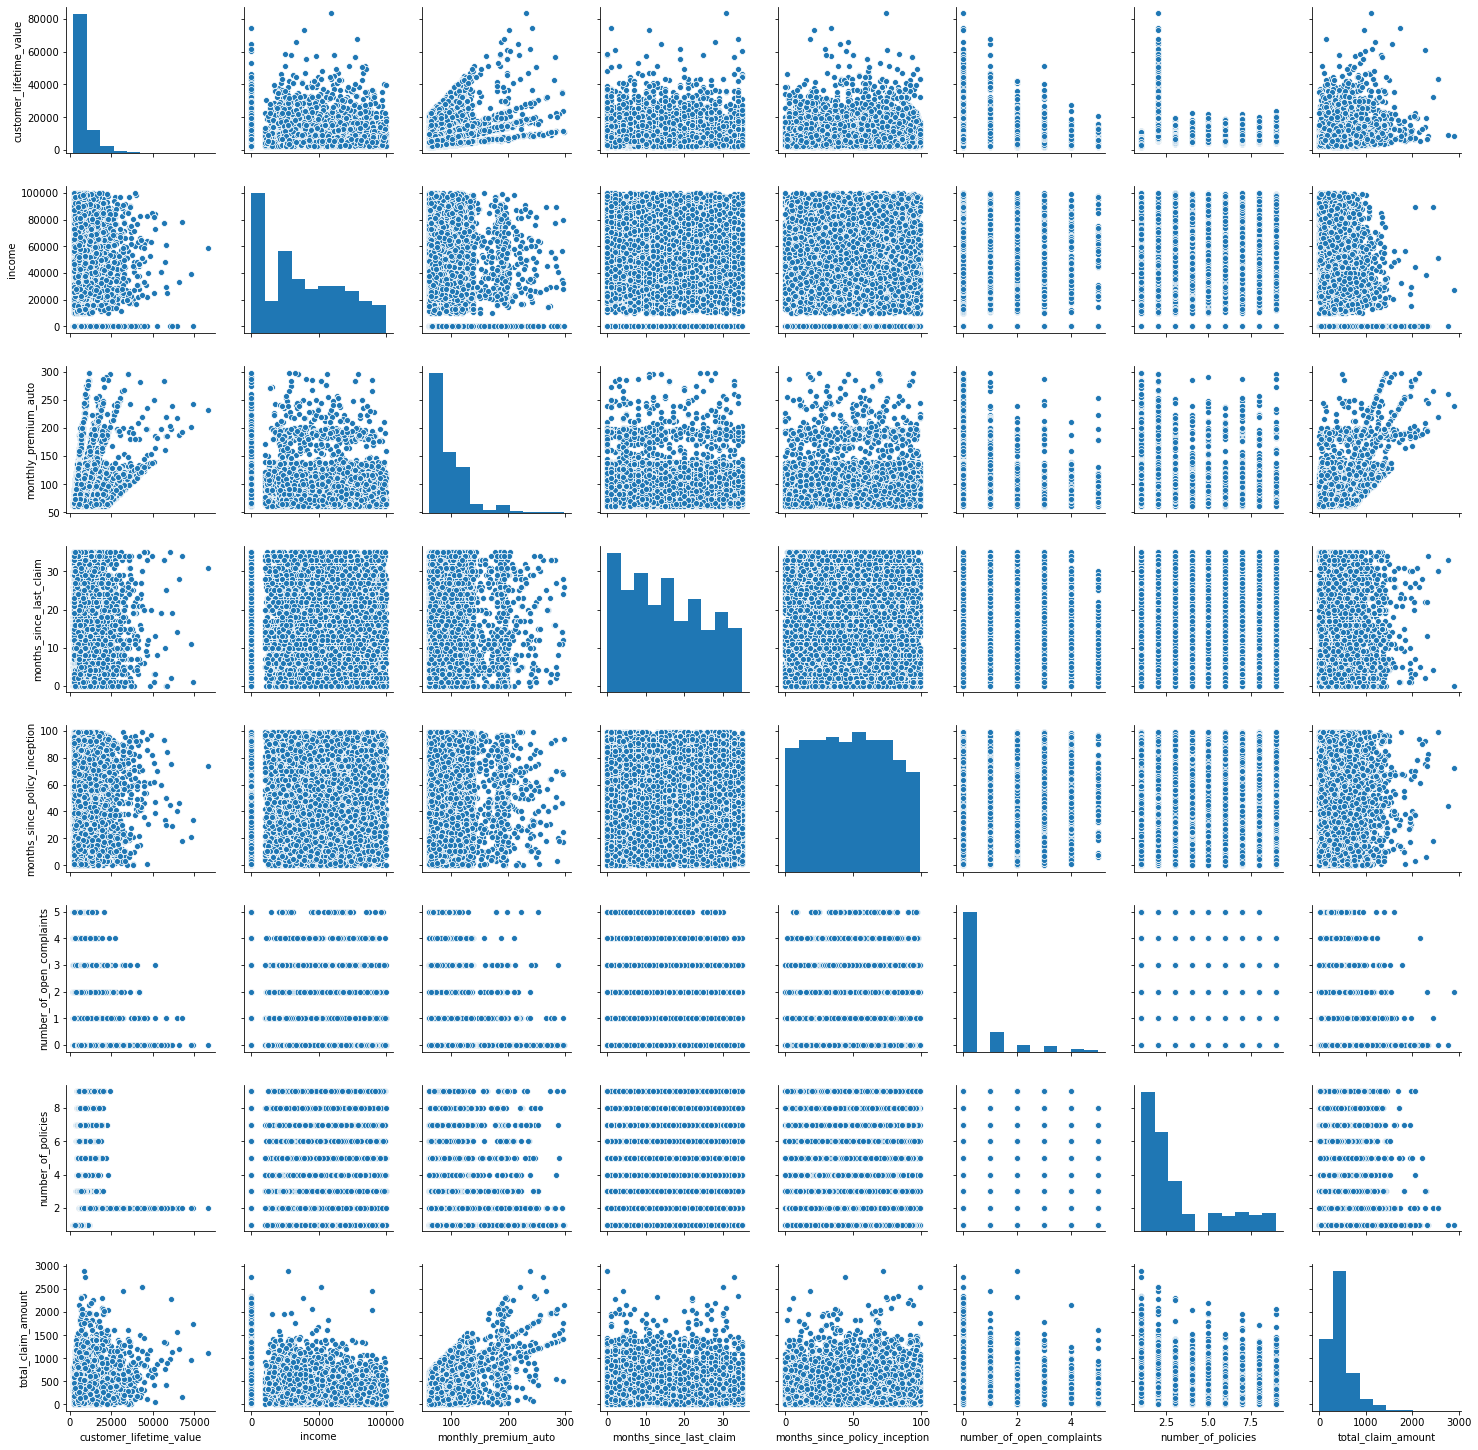

In [125]:
# Checking the data by visualization, especially checking for multicollinearity
sns.pairplot(data)

In [126]:
#Check and deal with NaN values.
def nulls_data(df):
    nulls_df = pd.DataFrame(round(df.isna().sum()/len(df)*100,2))
    nulls_df = nulls_df.reset_index()
    nulls_df.columns = ['header_name', '%_null_values'] 
    return nulls_df

In [127]:
res_null=nulls_data(data)
res_null

,header_name,%_null_values
0,customer,0.00
1,state,5.78
2,customer_lifetime_value,0.00
3,response,5.78
4,coverage,0.00
5,education,0.00
6,effective_to_date,0.00
7,employmentstatus,0.00
8,gender,0.00
9,income,0.00


In [128]:
columns_drop = res_null[res_null['%_null_values']>5]['header_name']
columns_drop

1                         state
3                      response
13      months_since_last_claim
15    number_of_open_complaints
22                vehicle_class
23                 vehicle_size
24                 vehicle_type
Name: header_name, dtype: object

Check the data types of the columns. Get the numeric data into dataframe called data_num and categorical columns in a dataframe called data_cat.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively).

In [129]:
data_num = data.select_dtypes(include = np.number)
data_cat = data.select_dtypes(include = np.object)
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
numerical_columns = data.select_dtypes(exclude=['object']).columns.tolist()


In [130]:
data_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [131]:
# Fixing NAN values which are categorical and replacing them with 'None'
def null_cat_fix(df):
    cat_cols= df.select_dtypes(include=['object']).columns.tolist()
    for col in cat_cols:
        df[col] = df[col].fillna('None')
    return df    
    

In [132]:
null_cat_fix(data)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,None
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,None
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,None
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [65]:
# checking again if the problem with missing categorical data is solved
nulls_data(data)

,header_name,%_null_values
0,customer,0.0
1,state,0.0
2,customer_lifetime_value,0.0
3,response,0.0
4,coverage,0.0
5,education,0.0
6,effective_to_date,0.0
7,employmentstatus,0.0
8,gender,0.0
9,income,0.0


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10910 non-null  object 
 1   state                          10910 non-null  object 
 2   customer_lifetime_value        10910 non-null  float64
 3   response                       10910 non-null  object 
 4   coverage                       10910 non-null  object 
 5   education                      10910 non-null  object 
 6   effective_to_date              10910 non-null  object 
 7   employmentstatus               10910 non-null  object 
 8   gender                         10910 non-null  object 
 9   income                         10910 non-null  int64  
 10  location_code                  10910 non-null  object 
 11  marital_status                 10910 non-null  object 
 12  monthly_premium_auto           10910 non-null 

In [134]:
#Describe DataFrame.
summary = data.describe().T
summary

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.000000
monthly_premium_auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,10277.0,15.149071,10.080349,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,10277.0,0.384256,0.912457,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,10910.0,434.888330,292.180556,0.099007,271.082527,382.564630,547.200000,2893.239678


In [135]:
# Exploring target 
len(data.total_claim_amount.unique())

5106

In [136]:
data['total_claim_amount']

0         292.800000
1         744.924331
2         480.000000
3         484.013411
4         707.925645
            ...     
10905    1214.400000
10906     273.018929
10907     381.306996
10908     618.288849
10909    1021.719397
Name: total_claim_amount, Length: 10910, dtype: float64

checking multocolinearity and correlation between variables

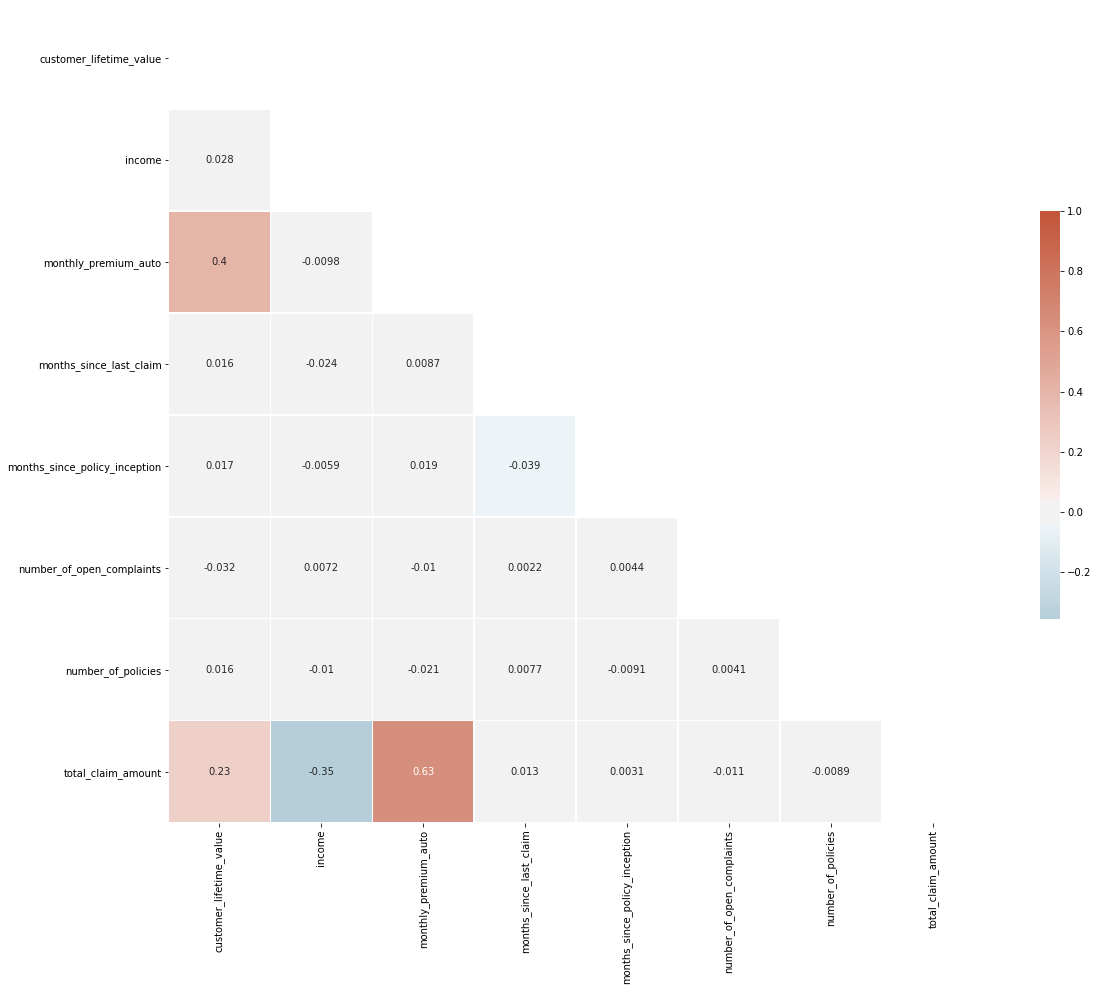

In [137]:
# correlation between different numeical variables and the target
f, ax = plt.subplots(figsize=(20, 15))
mat = data_num.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [138]:
numerical_columns

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

In [139]:
# The column 'vehicle_type', 'months_since_last_claim' and 'number_of_open_complaints' are dropped because of the high percentage of missing data and weak correlation with target (total_claim_amount)
# column 'number_of_policies' and 'months_since_policy_inception' due to weak correlation with target 
data = data.drop(['vehicle_type', 'number_of_policies','number_of_open_complaints','months_since_last_claim','months_since_policy_inception','number_of_policies' ],axis=1)


In [140]:
data_num.drop(['number_of_policies','months_since_last_claim','number_of_open_complaints','months_since_policy_inception','number_of_policies' ],axis=1, inplace=True)


In [141]:
# Another way to check correlation-VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_variables = data_num.drop(['total_claim_amount'],axis=1)

In [142]:
X_variables

,customer_lifetime_value,income,monthly_premium_auto
0,4809.216960,48029,61
1,2228.525238,0,64
2,14947.917300,22139,100
3,22332.439460,49078,97
4,9025.067525,23675,117
...,...,...,...
10905,15563.369440,0,253
10906,5259.444853,61146,65
10907,23893.304100,39837,201
10908,11971.977650,64195,158


In [143]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]
vif_data

,feature,VIF
0,customer_lifetime_value,2.816589
1,income,2.126310
2,monthly_premium_auto,3.814834


These VIF values should be checked to be less than max of 10 and 1/1-R²model

In [144]:

Y=data['total_claim_amount']



In [145]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols
X = sm.add_constant(X_variables)
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     3945.
Date:                Tue, 14 Dec 2021   Prob (F-statistic):               0.00
Time:                        20:39:37   Log-Likelihood:                -73412.
No. Observations:               10910   AIC:                         1.468e+05
Df Residuals:                   10906   BIC:                         1.469e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [146]:
max(10,1.37)

10

so, all the numerical features have VIF less than max of 10 and 1/1-R²model. There is no missing numerical variable

In [147]:
# numerical_columns should be updated!
numerical_columns = data.select_dtypes(exclude=['object']).columns.tolist()

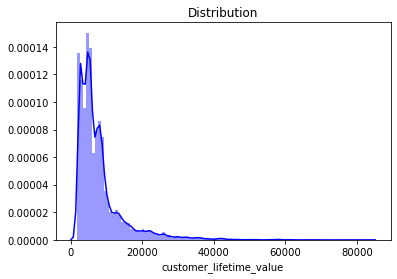

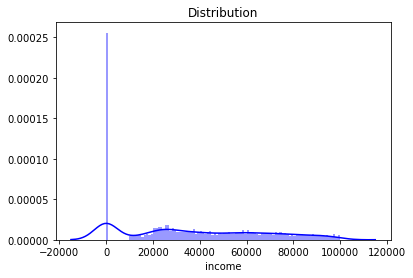

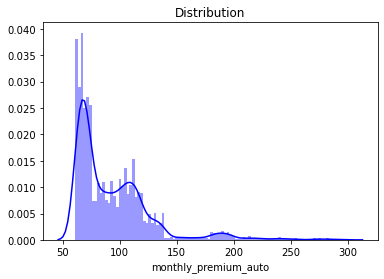

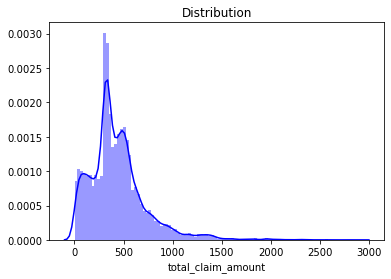

In [148]:
#Now we will try to check the normality of the numerical variables visually
#seaborn library is used to construct distribution plots for the numerical variables
for col in numerical_columns:
    sns.distplot(data_num[col],bins= 100, 
                   color = 'blue')
    plt.title('Distribution')
    plt.show()

In [37]:
## Do the distributions for different numerical variables look like a normal distribution
#Answer: no, it does not, and they are skewed.

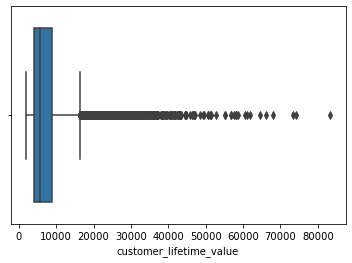

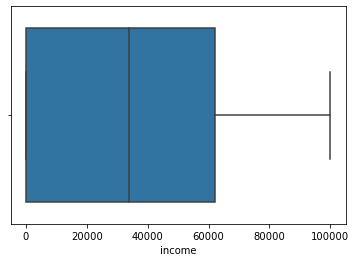

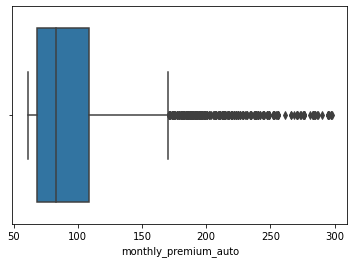

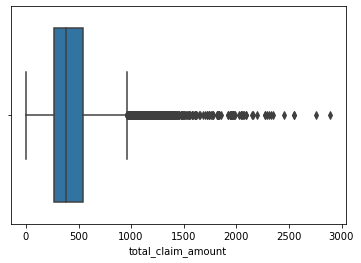

In [149]:
# checking for outliers
for col in numerical_columns:
    sns.boxplot(data_num[col])
    plt.show()

In [150]:
# From numerical variables most of the variables have outliers which should be corrected
# column customer_lifetime_value-removing outliers
data_num['customer_lifetime_value'].unique()

array([ 4809.21696 ,  2228.525238, 14947.9173  , ...,  5259.444853,
       23893.3041  , 11971.97765 ])

In [151]:
iqr=np.percentile(data_num['customer_lifetime_value'],75)-np.percentile(data_num['customer_lifetime_value'],25)
upper_limit=np.percentile(data_num['customer_lifetime_value'],75) +1.5*iqr
lower_limit=np.percentile(data_num['customer_lifetime_value'],75) -1.5*iqr
upper_limit, lower_limit

(16460.268173000004, 1525.2901010000005)

In [152]:
data = data[(data_num['customer_lifetime_value']>lower_limit) & (data_num['customer_lifetime_value']<upper_limit)]
data = data.reset_index()
data=data.drop(['index'], axis=1)

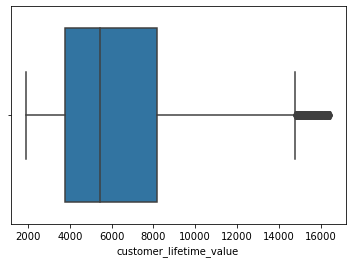

In [153]:
sns.boxplot(data['customer_lifetime_value'])

In [154]:
# monthly_premium_auto-removing outliers
data_num['monthly_premium_auto'].unique()

array([ 61,  64, 100,  97, 117,  63, 154,  85, 127,  62,  99,  69, 116,
       114,  66,  73,  94, 104, 189,  74, 121, 110, 111,  72, 115, 159,
       101,  65,  82,  71, 126,  68, 199,  96,  67, 125, 249, 105,  92,
        78,  77,  79, 223, 242,  70, 102, 109, 107, 119, 194, 113, 106,
       247,  80,  86,  81,  83, 122, 253, 196, 132, 139,  84, 130,  93,
       103, 112, 222, 118,  88, 182, 283,  90, 128,  89, 235, 190,  76,
        87, 133, 153, 129,  98, 148, 123,  91, 211, 131, 108, 187, 214,
       181, 173, 252,  95, 124, 137, 145, 188, 143, 198, 138, 245, 195,
       186, 170, 136, 161, 157, 141, 205, 271, 192, 142, 140, 134, 240,
       185, 244, 210, 184, 202, 296, 213, 273, 219, 135, 169, 155, 225,
       266, 215, 197, 256, 212, 158, 180, 166, 168, 183, 162, 191, 179,
       150, 146, 276, 165, 239, 237, 193, 229, 274, 207, 295, 208, 172,
       217, 206, 201, 171, 152, 156, 174, 238, 167, 151, 144, 163, 287,
       209, 290, 220, 228, 232, 178, 177, 275, 176, 281, 149, 29

In [155]:
iqr1=np.percentile(data_num['monthly_premium_auto'],75)-np.percentile(data_num['monthly_premium_auto'],25)
upper_limit1=np.percentile(data_num['monthly_premium_auto'],75) +1.5*iqr1
lower_limit1=np.percentile(data_num['monthly_premium_auto'],75) -1.5*iqr1
upper_limit1, lower_limit1

(170.5, 47.5)

In [156]:
data = data[(data_num['monthly_premium_auto'] > lower_limit1) & (data_num['monthly_premium_auto'] < upper_limit1)]
data = data.reset_index()
data=data.drop(['index'], axis=1)
data['monthly_premium_auto']


0        61
1        64
2       100
3       117
4        61
       ... 
9455     74
9456    253
9457     65
9458    158
9459    101
Name: monthly_premium_auto, Length: 9460, dtype: int64

In [167]:
iqr2=np.percentile(data_num['total_claim_amount'],75)-np.percentile(data_num['total_claim_amount'],25)
upper_limit2=np.percentile(data_num['total_claim_amount'],75) +1.5*iqr2
lower_limit2=np.percentile(data_num['total_claim_amount'],75) -1.5*iqr2
upper_limit2, lower_limit2


(961.3762098750001, 133.02379012500006)

In [169]:
data = data[(data_num['total_claim_amount'] > lower_limit2) & (data_num['total_claim_amount'] < upper_limit2)]
data = data.reset_index()
data=data.drop(['index'], axis=1)
data['total_claim_amount']


0        292.800000
1        744.924331
2        480.000000
3        707.925645
4        292.800000
           ...     
7770     655.200000
7771     355.200000
7772    1214.400000
7773     618.288849
7774    1021.719397
Name: total_claim_amount, Length: 7775, dtype: float64

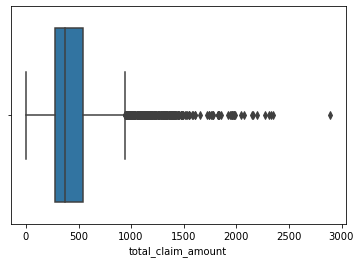

In [170]:
sns.boxplot(data['total_claim_amount'])

In [171]:
# updating the numerical data after removing the outlier
data_num = data.select_dtypes(include = np.number)
data_cat = data.select_dtypes(include = np.object)

In [172]:
# Checking skewness of the numerical features
skewed_features = data_num.apply(lambda x:stats.skew(x)).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew value' :skewed_features})
skewness.head(20)

,Skew value
monthly_premium_auto,1.982783
total_claim_amount,1.654936
customer_lifetime_value,0.962755
income,0.298284


In [173]:
# Fixing skewness of numerical features using log_transformation
skewed_features = data_num.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_features})
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index
    
for i in skew_index:
    data_num[i] = np.log1p(data_num[i])
data_num

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,8.478497,48029,4.127134,5.682899
1,7.709544,0,4.174387,6.614624
2,9.612394,22139,4.615121,6.175867
3,9.107872,23675,4.770685,6.563751
4,8.465096,50549,4.127134,5.682899
...,...,...,...,...
7770,8.183125,28304,4.521789,6.486466
7771,7.927564,59855,4.317488,5.875492
7772,9.652740,0,5.537334,7.102829
7773,9.390408,64195,5.068904,6.428572


In [179]:
 data_num.rename(columns={'monthly_premium_auto': 'monthly_premium_auto_log', 'total_claim_amount': 'total_claim_amount_log',
                              'customer_lifetime_value': 'customer_lifetime_value_log'}, inplace = True)

In [180]:
data_num

,customer_lifetime_value_log,income,monthly_premium_auto_log,total_claim_amount_log
0,8.478497,48029,4.127134,5.682899
1,7.709544,0,4.174387,6.614624
2,9.612394,22139,4.615121,6.175867
3,9.107872,23675,4.770685,6.563751
4,8.465096,50549,4.127134,5.682899
...,...,...,...,...
7770,8.183125,28304,4.521789,6.486466
7771,7.927564,59855,4.317488,5.875492
7772,9.652740,0,5.537334,7.102829
7773,9.390408,64195,5.068904,6.428572


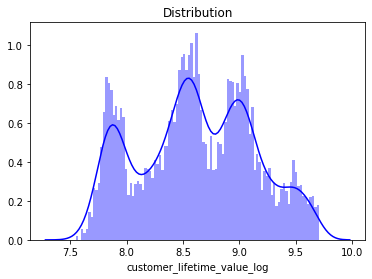

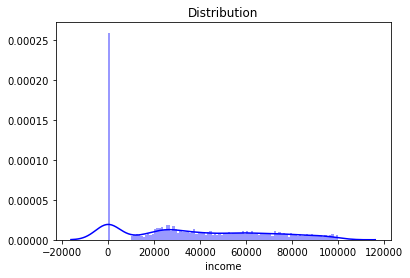

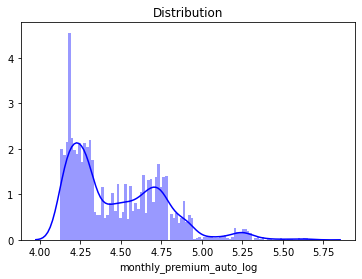

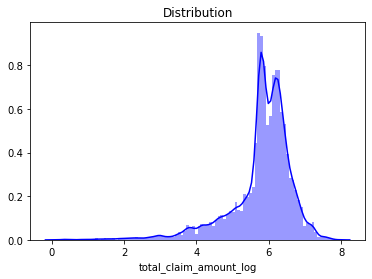

In [182]:
# the name of some columns was changed and numerical_columns list should be updated
numerical_columns = data_num.columns

# checking the distribution after lof_transform
for col in numerical_columns:
    sns.distplot(data_num[col],bins= 100, 
                   color = 'blue')
    plt.title('Distribution')
    plt.show()

In [184]:
# Standardization of the data and first the target value will be removed
numerical_features = data_num.drop(['total_claim_amount_log'],axis=1)
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(numerical_features)
x_standard = transformer.transform(numerical_features)
print(x_standard)

[[-0.27083534  0.35296213 -1.21449864]
 [-1.76936352 -1.22781477 -1.05029067]
 [ 1.93889006 -0.49915459  0.48129645]
 ...
 [ 2.01751476 -1.22781477  3.68607101]
 [ 1.50628496  0.88503316  2.058235  ]
 [ 0.42049654 -1.22781477  0.51553405]]


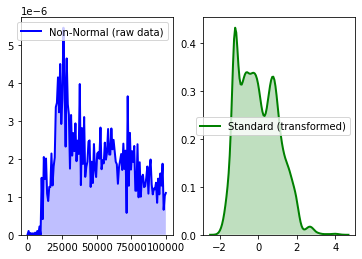

In [185]:
# checking the distribution
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
  
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(data_num, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal (raw data)", color ="blue", ax = ax[0])
  
sns.distplot(x_standard, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Standard (transformed)", color ="green", ax = ax[1])

In [186]:
cols=['customer_lifetime_value_log','income','monthly_premium_auto_log']
#converting the array to dataFrame
x_standard=pd.DataFrame(x_standard,columns=cols)
x_standard

,customer_lifetime_value_log,income,monthly_premium_auto_log
0,-0.270835,0.352962,-1.214499
1,-1.769364,-1.227815,-1.050291
2,1.938890,-0.499155,0.481296
3,0.955683,-0.448600,1.021896
4,-0.296952,0.435903,-1.214499
...,...,...,...
7770,-0.846454,-0.296246,0.156960
7771,-1.344489,0.742191,-0.553003
7772,2.017515,-1.227815,3.686071
7773,1.506285,0.885033,2.058235


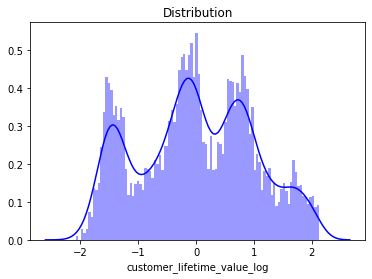

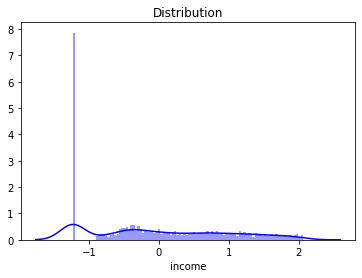

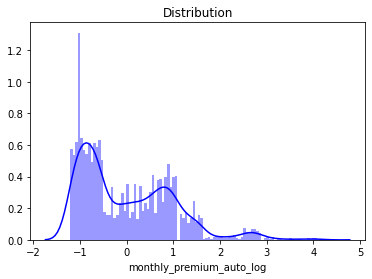

In [188]:
# checking distributions of the different numerical variable after standardization
for col in cols:
    sns.distplot(x_standard[col],bins= 100, 
                   color = 'blue')
    plt.title('Distribution')
    plt.show()

In [187]:
# cleaning categorical data
data_cat

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize
4,HO81102,None,None,Basic,High School or Below,2/14/11,Employed,M,Suburban,Divorced,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7770,PP30874,California,No,Extended,High School or Below,1/24/11,Employed,F,Suburban,Married,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car,Medsize
7771,SU71163,Arizona,No,Basic,College,1/7/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize
7772,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize
7773,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize


In [189]:
data_cat['gender'].unique()

array(['M', 'F'], dtype=object)

In [61]:
# replacing 'M':'male' and 'F':'female' in gender column

data_cat['gender'] = data_cat['gender'].replace({'M':'male', 'F':'female'})
data_cat['gender']

0         male
1       female
2         male
3       female
4         male
         ...  
9455      male
9456    female
9457    female
9458    female
9459      male
Name: gender, Length: 9460, dtype: object

In [190]:
data_cat

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize
4,HO81102,None,None,Basic,High School or Below,2/14/11,Employed,M,Suburban,Divorced,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7770,PP30874,California,No,Extended,High School or Below,1/24/11,Employed,F,Suburban,Married,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car,Medsize
7771,SU71163,Arizona,No,Basic,College,1/7/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize
7772,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize
7773,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize


In [191]:
data_cat['coverage'].unique()

array(['Basic', 'Premium', 'Extended'], dtype=object)

In [192]:
data_cat['education'].unique()

array(['College', 'Bachelor', 'High School or Below', 'Doctor', 'Master'],
      dtype=object)

In [194]:
 # For columns 'coverage' and 'education' LabelEncoder could be used because they are ordinal data

label1 = preprocessing.LabelEncoder()
data_cat['education'] = label1.fit_transform(data_cat['education'])
data_cat['education']



0       1
1       1
2       0
3       0
4       3
       ..
7770    3
7771    1
7772    0
7773    1
7774    0
Name: education, Length: 7775, dtype: int32

In [195]:
# labelencoder assigns values to categories alphabetically which does not have a correct order for education collumn and it must be corrected!
# I did it using replace
data_cat['education'] = data_cat['education'].replace({0:2, 1:1, 2:4, 3:0, 4:3})
data_cat['education']

0       1
1       1
2       2
3       2
4       0
       ..
7770    0
7771    1
7772    2
7773    1
7774    2
Name: education, Length: 7775, dtype: int64

In [196]:
label2 = preprocessing.LabelEncoder()
data_cat['coverage'] = label2.fit_transform(data_cat['coverage'])
data_cat['coverage']

0       0
1       0
2       0
3       2
4       0
       ..
7770    1
7771    0
7772    2
7773    2
7774    0
Name: coverage, Length: 7775, dtype: int32

In [197]:
data_cat

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,DK49336,Arizona,No,0,1,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,KX64629,California,No,0,1,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,LZ68649,Washington,No,0,2,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,QA50777,Oregon,No,2,2,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize
4,HO81102,None,None,0,0,2/14/11,Employed,M,Suburban,Divorced,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7770,PP30874,California,No,1,0,1/24/11,Employed,F,Suburban,Married,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car,Medsize
7771,SU71163,Arizona,No,0,1,1/7/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize
7772,FE99816,Nevada,No,2,2,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize
7773,WA60547,California,No,2,1,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize


In [198]:
# columns 'customer' and 'effective_to_date' could be removed because they do not contain useful information
data_cat=data_cat.drop(['customer','effective_to_date'], axis = 1)
data_cat

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Arizona,No,0,1,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,California,No,0,1,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,Washington,No,0,2,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,Oregon,No,2,2,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize
4,None,None,0,0,Employed,M,Suburban,Divorced,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7770,California,No,1,0,Employed,F,Suburban,Married,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car,Medsize
7771,Arizona,No,0,1,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize
7772,Nevada,No,2,2,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize
7773,California,No,2,1,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize


In [199]:
# Concatanating numerical and categorical variable to have a single dataframe x
x= pd.concat([x_standard, data_cat],axis= 1)
x

,customer_lifetime_value_log,income,monthly_premium_auto_log,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,-0.270835,0.352962,-1.214499,Arizona,No,0,1,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,-1.769364,-1.227815,-1.050291,California,No,0,1,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,1.938890,-0.499155,0.481296,Washington,No,0,2,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,0.955683,-0.448600,1.021896,Oregon,No,2,2,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize
4,-0.296952,0.435903,-1.214499,None,None,0,0,Employed,M,Suburban,Divorced,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7770,-0.846454,-0.296246,0.156960,California,No,1,0,Employed,F,Suburban,Married,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car,Medsize
7771,-1.344489,0.742191,-0.553003,Arizona,No,0,1,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize
7772,2.017515,-1.227815,3.686071,Nevada,No,2,2,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize
7773,1.506285,0.885033,2.058235,California,No,2,1,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize


In [200]:
# Encoding nominal categorical variables 
x= pd.get_dummies(x,drop_first=True)
x

,customer_lifetime_value_log,income,monthly_premium_auto_log,coverage,education,state_California,state_Nevada,state_None,state_Oregon,state_Washington,response_None,response_Yes,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_None,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_None,vehicle_size_Small
0,-0.270835,0.352962,-1.214499,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,-1.769364,-1.227815,-1.050291,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,1.938890,-0.499155,0.481296,0,2,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
3,0.955683,-0.448600,1.021896,2,2,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,-0.296952,0.435903,-1.214499,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7770,-0.846454,-0.296246,0.156960,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7771,-1.344489,0.742191,-0.553003,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0
7772,2.017515,-1.227815,3.686071,2,2,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0
7773,1.506285,0.885033,2.058235,2,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0


In [203]:
# target
y=data_num['total_claim_amount_log']
y

0       5.682899
1       6.614624
2       6.175867
3       6.563751
4       5.682899
          ...   
7770    6.486466
7771    5.875492
7772    7.102829
7773    6.428572
7774    6.930220
Name: total_claim_amount_log, Length: 7775, dtype: float64

In [205]:
# splitting data to training and test sets
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size= 0.20, random_state=100)

In [208]:
# Applying linear regression

# metrics
# checking different errors and defining a function for each of them
def r2(y, y_pred):
    return r2_score(y, y_pred)
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))
    return (rmse)
def mse(y, y_pred):
    return mean_squared_error(y, y_pred) 
def mae(y, y_pred):
    return mean_absolute_error(y, y_pred) 

# Linear Regression

lreg = LinearRegression()
lreg_model = lreg.fit(x_train, y_train)
y_pred = lreg_model.predict(x_test)
y_pred_train = lreg_model.predict(x_train)


In [209]:
# errors as a dataframe
scores={'R2':[r2(y_test, y_pred),r2(y_train, y_pred_train)],'MSE': [mse(y_test, y_pred),mse(y_train, y_pred_train)],'RMSE':[rmse(y_test, y_pred),rmse(y_train, y_pred_train)],'MAE':[mae(y_test, y_pred),mae(y_train, y_pred_train)]}

final_score = pd.DataFrame(scores, index=['scores of test set', 'scores of training set'])
final_score 

,R2,MSE,RMSE,MAE
scores of test set,0.749116,0.196141,0.442878,0.263792
scores of training set,0.757324,0.184853,0.429945,0.260955
